In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
# sns.set_palette("dark")
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\Portfolio\\03_IMDB_reviews\\IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
duplicatedfRow = df[df.duplicated(keep=False)]
duplicatedfRow.sort_values("review", inplace = True)
duplicatedfRow.shape

(824, 2)

In [5]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [6]:
df.shape

(49582, 2)

In [7]:
txt = ' '.join(df['review'])
txt=txt.split()
freq_cnt = pd.Series(txt).value_counts()
type(freq_cnt)

pandas.core.series.Series

In [8]:
freq_DF = freq_cnt.to_frame()

In [9]:
freq_DF.tail()

,0
dupe.<br,1
Hours.,1
night...(,1
..Lets,1
Yosemite.<br,1


In [10]:
freq=df['review'].str.split(expand=True).stack().value_counts().to_frame()
freq.rename(columns = {0:'count'}, inplace = True) 
   
freq.head()

,count
the,564474
a,304819
and,299760
of,281597
to,259895


In [11]:
print("Total number of words in Corpus are ",freq['count'].sum())

Total number of words in Corpus are  11470804


In [12]:
print("Total number of words that has appeared more than 3000 times in Corpus are ",freq.loc[freq['count']>3000].shape[0])
print("Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are ",freq.loc[freq['count']<=3000].loc[freq['count']>2500].shape[0])
print("Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are ",freq.loc[freq['count']<=2500].loc[freq['count']>2000].shape[0])
print("Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are ",freq.loc[freq['count']<=2000].loc[freq['count']>1500].shape[0])
print("Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are ",freq.loc[freq['count']<=1500].loc[freq['count']>1000].shape[0])
print("Total number of words that has appeared less than 1000 times and more than 500 times in Corpus are ",freq.loc[freq['count']<=1000].loc[freq['count']>500].shape[0])
print("Total number of words that has appeared less than 500 times and more than 400 times in Corpus are ",freq.loc[freq['count']<=500].loc[freq['count']>400].shape[0])
print("Total number of words that has appeared less than 400 times and more than 300 times in Corpus are ",freq.loc[freq['count']<=400].loc[freq['count']>300].shape[0])
print("Total number of words that has appeared less than 300 times and more than 200 times in Corpus are ",freq.loc[freq['count']<=300].loc[freq['count']>200].shape[0])
print("Total number of words that has appeared less than 200 times and more than 100 times in Corpus are ",freq.loc[freq['count']<=200].loc[freq['count']>100].shape[0])
print("Total number of words that has appeared less than 100 times and more than 50 times in Corpus are ",freq.loc[freq['count']<=100].loc[freq['count']>50].shape[0])
print("Total number of words that has appeared less than 50 times and more than 25 times in Corpus are ",freq.loc[freq['count']<=50].loc[freq['count']>25].shape[0])
print("Total number of words that has appeared less than 25 times and more than 15 times in Corpus are ",freq.loc[freq['count']<=25].loc[freq['count']>15].shape[0])
print("Total number of words that has appeared less than 15 times and more than 10 times in Corpus are ",freq.loc[freq['count']<=15].loc[freq['count']>10].shape[0])
print("Total number of words that has appeared less than 10 times and more than 5 times in Corpus are ",freq.loc[freq['count']<=10].loc[freq['count']>5].shape[0])
print("Total number of words that has appeared less than 5 times and more than 3 times in Corpus are ",freq.loc[freq['count']<=5].loc[freq['count']>3].shape[0])
print("Total number of words that has appeared 3 times in Corpus are ",freq.loc[freq['count']==3].shape[0])
print("Total number of words that has appeared 2 times in Corpus are ",freq.loc[freq['count']==2].shape[0])
print("Total number of words that has appeared 1 times in Corpus are ",freq.loc[freq['count']==1].shape[0])

Total number of words that has appeared more than 3000 times in Corpus are  358
Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are  77
Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are  88
Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are  185
Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are  326
Total number of words that has appeared less than 1000 times and more than 500 times in Corpus are  869
Total number of words that has appeared less than 500 times and more than 400 times in Corpus are  426
Total number of words that has appeared less than 400 times and more than 300 times in Corpus are  709
Total number of words that has appeared less than 300 times and more than 200 times in Corpus are  1228
Total number of words that has appeared less than 200 times and more than 100 times in C

In [13]:
text = " ".join(review for review in df['review'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 65030175 words in the combination of all review.


In [14]:
conda install -c conda-forge wordcloud


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: wordcloud


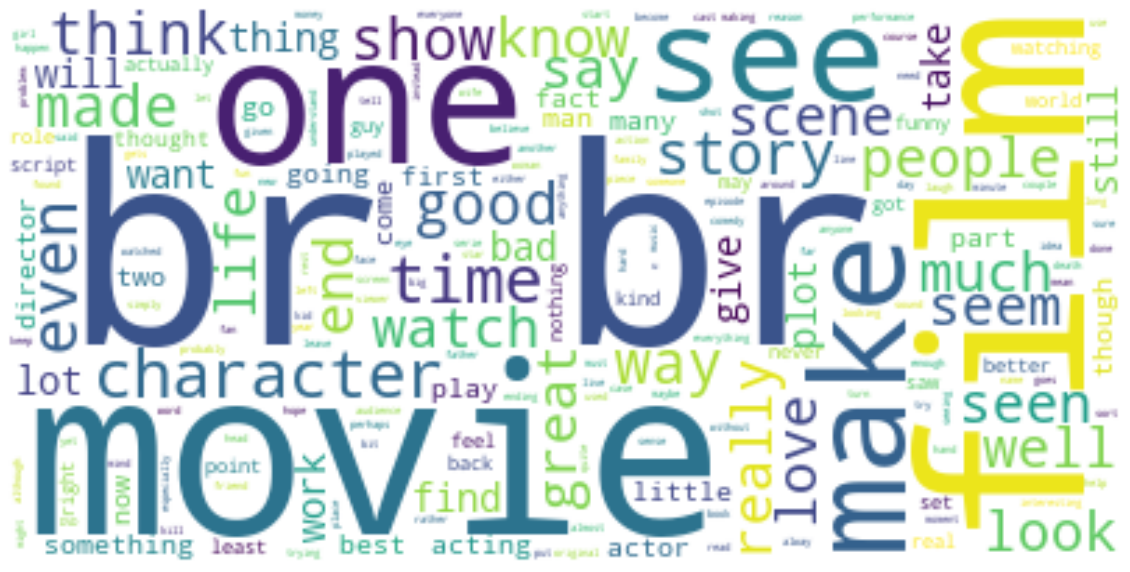

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

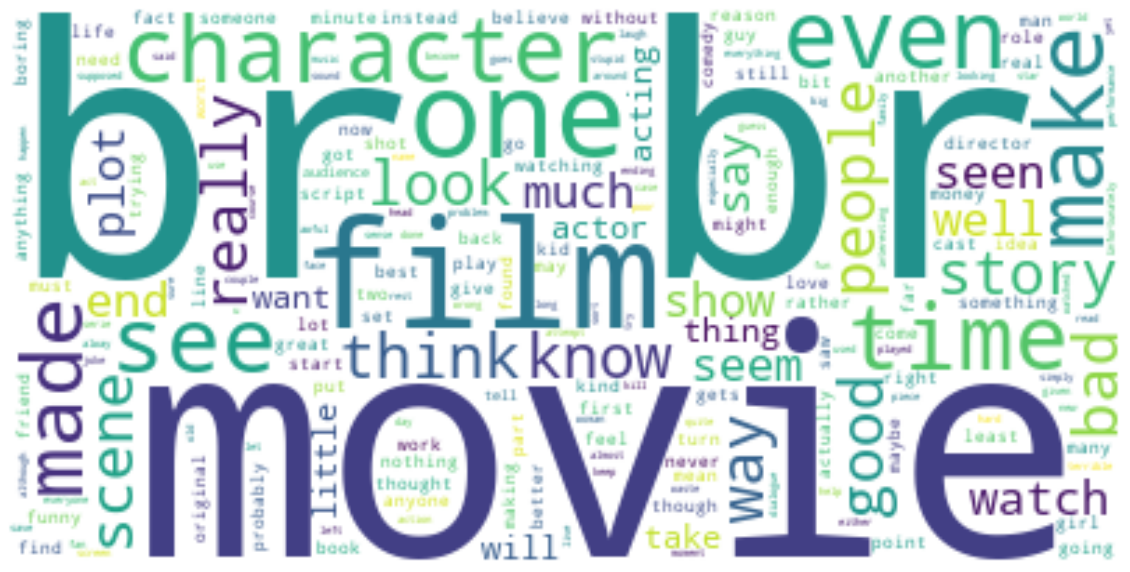

In [16]:
#negative cloud
textNeg = " ".join(review for review in df['review'].loc[df['sentiment']=='negative'])
# textNeg=textNeg.replace('flight', '')
# textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

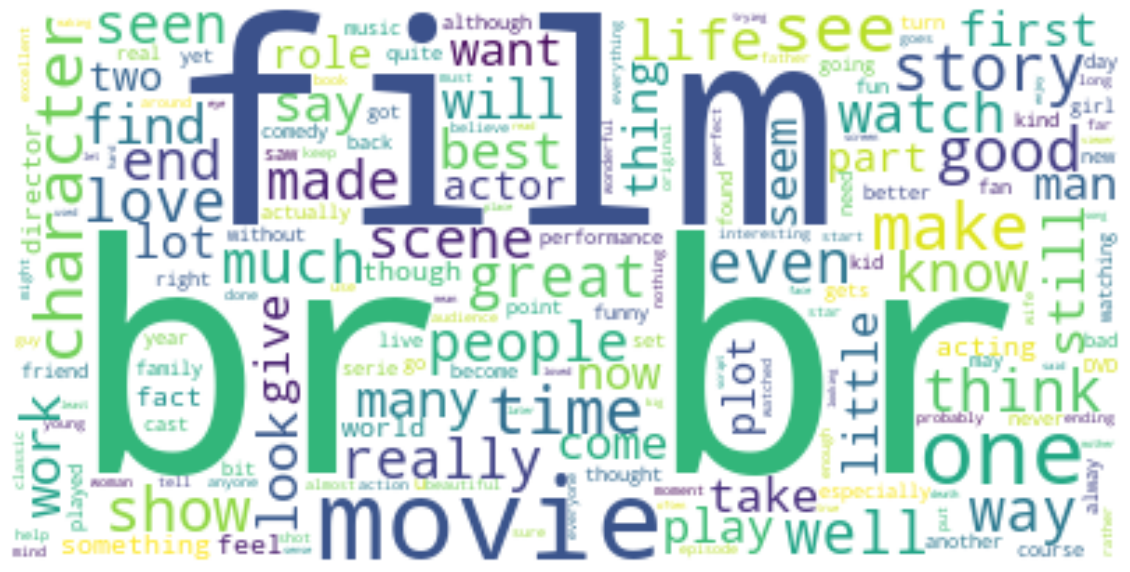

In [17]:
#positive cloud
textNeg = " ".join(review for review in df['review'].loc[df['sentiment']=='positive'])
# textNeg=textNeg.replace('flight', '')
# textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Preprocessing

In [18]:
df["sentiment"].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [19]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('http"', ' ')          # added later
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [20]:
# Create a new column for clean text
df['text_clean']=preprocess_text(df['review'].values)

100%|███████████████████████████████████████████████████████████████████████████| 49582/49582 [00:51<00:00, 963.71it/s]


In [21]:
# drop the original column of text
df=df.drop(['review'],axis=1)

In [22]:
df.head()

,sentiment,text_clean
0,positive,one reviewers mentioned watching 1 oz episode ...
1,positive,wonderful little production br br filming tech...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter mattei love time money visually stunnin...


In [23]:
# convert class label into numerical number
df['sentiment'].replace(to_replace='positive', value=1, inplace=True)
df['sentiment'].replace(to_replace='negative', value=0, inplace=True)
df.head()

,sentiment,text_clean
0,1,one reviewers mentioned watching 1 oz episode ...
1,1,wonderful little production br br filming tech...
2,1,thought wonderful way spend time hot summer we...
3,0,basically family little boy jake thinks zombie...
4,1,petter mattei love time money visually stunnin...


In [25]:
# store preprocessed data in csv
df.to_csv("D:\\Portfolio\\03_IMDB_reviews\\IMDB_Preprocessed.csv")